# Feature Engineering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Read in sumo csv data
sumo_df = pd.read_csv('../data/sumo_df.csv')

In [3]:
sumo_df.shape

(8942, 14)

In [4]:
sumo_df.head()

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
0,7522,10438,0,Hakushuzan,NaN,-,0001-01-01T00:00:00Z,NaN,NaN,195401,1959-05-01T00:00:00Z,27,36,63
1,2973,5772,0,Wakahokkai Gentaro,NaN,Hanakago,1943-03-02T00:00:00Z,NaN,NaN,195907,1966-09-01T00:00:00Z,146,160,306
2,6428,6679,0,Kakuryuasahi,NaN,Oshima,1971-02-24T00:00:00Z,178.5,111.0,198705,1988-11-01T00:00:00Z,26,23,49
3,3683,381,0,Katsumayama Shuichi,NaN,Naruto,1978-04-05T00:00:00Z,177.0,113.5,199403,2005-05-01T00:00:00Z,223,211,434
4,6560,7299,0,Otsuru,NaN,Takadagawa,1967-05-14T00:00:00Z,186.0,77.0,198303,1987-09-01T00:00:00Z,78,73,151


## Checking For Duplicate Rikishi

#### There should only be one ID per rikishi, but some of them are duplicated.  Check Japan Sumo Association to cros check record data.

In [5]:
sumo_df['sumodb_id'].value_counts()

sumodb_id
12545    2
12105    2
12816    2
8903     2
7497     1
        ..
12514    1
943      1
1460     1
10641    1
12896    1
Name: count, Length: 8938, dtype: int64

In [6]:
sumo_df[sumo_df['sumodb_id'] == 12545]

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
343,8175,12545,3936,Daishinkai,Jonidan 30 East,Otake,1992-12-24T15:00:00Z,180.0,167.0,201903,NaN,41,65,106
2953,217,12545,3936,Daishinkai,Sandanme 22 West,Otake,2000-04-25T00:00:00Z,174.0,135.0,201903,NaN,103,93,196


In [7]:
# record 2953 is correct for Daishinkai
sumo_df.drop(index = 343, inplace = True)

In [8]:
sumo_df[sumo_df['sumodb_id'] == 12105]

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
6378,189,12105,0,Oki,Sandanme 66 East,Shikoroyama,1996-06-12T00:00:00Z,182.0,153.0,201307,2024-06-28T00:00:00Z,231,192,423
8932,8934,12105,3496,Oki,Sandanme 36 West,Shikoroyama,1996-06-11T15:00:00Z,186.0,158.8,202407,NaN,0,0,0


In [9]:
# 6378 is the correct record for Oki
sumo_df.drop(index = 8932, inplace = True)

In [10]:
sumo_df[sumo_df['sumodb_id'] == 12816]

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
8782,8861,12816,4207,Togyokuko,Jonidan 78 West,Tamanoi,2007-08-29T00:00:00Z,172.0,114.0,202305,NaN,22,30,52
8807,8886,12816,4207,Togyokuko,Jonidan 86 East,Tamanoi,2007-08-29T00:00:00Z,172.0,119.3,202311,NaN,0,0,0


In [11]:
# 8782 is the correct record for Togyokuko
sumo_df.drop(index = 8807, inplace = True)

In [12]:
sumo_df[sumo_df['sumodb_id'] == 8903]

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
8533,246,8903,0,Keitenkai,Sandanme 43 West,Onomatsu,1990-03-10T00:00:00Z,175.5,113.0,200801,2024-03-05T00:00:00Z,336,252,588
8902,8904,8903,3059,Keitenkai,Sandanme 43 West,Onomatsu,1990-03-09T15:00:00Z,175.0,112.5,202403,NaN,0,0,0


In [13]:
# 8533 is the correct record for Keitenkai
sumo_df.drop(index = 8902, inplace = True)

In [14]:
# All Rikishi duplicates have been removed
sumo_df['sumodb_id'].value_counts()

sumodb_id
10438    1
5531     1
11780    1
7497     1
7122     1
        ..
943      1
1460     1
10641    1
2415     1
12896    1
Name: count, Length: 8938, dtype: int64

## Rikishi that never participated in any basho (tournament).

#### Either they are brand new in the Japan Sumo Association or they retired before participating in any basho.  Unable to specifically confirm reasons for the latter, but suspect injury, personal reasons, or inaccurate data (Nakanotate was active, but no specific match data in this set).

In [15]:
#508 total records have no match data.  The model is meant to predict how successful a rikishi is basedo on wins, so these rows will be dropped.
sumo_df[(sumo_df['total_wins'] == 0) & (sumo_df['total_losses'] == 0)]


,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
17,7297,7962,0,Hoshisato,NaN,Michinoku,1961-10-23T00:00:00Z,172.5,78.0,197909,1979-11-01T00:00:00Z,0,0,0
24,8831,10516,0,Asakaze,NaN,-,0001-01-01T00:00:00Z,NaN,NaN,195907,1959-09-01T00:00:00Z,0,0,0
29,7944,8926,0,Kakuta,NaN,Oyama,1954-08-27T00:00:00Z,176.0,84.0,197001,1970-03-01T00:00:00Z,0,0,0
35,7715,10474,0,Nakanotate,NaN,-,0001-01-01T00:00:00Z,NaN,NaN,195403,1958-03-01T00:00:00Z,0,0,0
64,4643,7161,0,Takeuchi Yuki,NaN,Shikoroyama,1990-07-21T00:00:00Z,170.0,114.0,200703,2007-05-01T00:00:00Z,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,7898,9012,0,Mikami,NaN,-,0001-01-01T00:00:00Z,NaN,NaN,197111,1972-03-01T00:00:00Z,0,0,0
8786,8865,12820,4211,Sogo,Jonokuchi 16 West,Ajigawa,2006-07-26T00:00:00Z,181.0,78.0,202305,2023-05-31T00:00:00Z,0,0,0
8852,7344,8195,0,Sato,NaN,-,0001-01-01T00:00:00Z,NaN,NaN,197611,1977-01-01T00:00:00Z,0,0,0
8940,8942,12894,4285,Ishizaki,Makushita 60 East,Takasago,2000-08-08T15:00:00Z,172.0,117.0,202407,NaN,0,0,0


In [16]:
sumo_df = sumo_df.drop(sumo_df[(sumo_df['total_wins'] == 0) & (sumo_df['total_losses'] == 0)].index)

## One Birthday and Heya Missing

In [17]:
# One record is missing a birthday and heya, which is November 25th, 2005 and Ajigawa respectively
sumo_df[sumo_df['birthday'].isnull()]

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
8810,8889,12844,4235,Anhibiki,Sandanme 62 East,NaN,NaN,NaN,NaN,202401,NaN,21,7,28


In [18]:
sumo_df.loc[8810, 'birthday'] = '2005-11-25T00:00:00Z' # Keeping it the same format as other entries, but expect to change this for all later.
sumo_df.loc[8810, 'heya'] ='Ajigawa'

In [19]:
sumo_df.loc[8810]

id                               8889
sumodb_id                       12844
nsk_id                           4235
ring_name                    Anhibiki
current_rank         Sandanme 62 East
heya                          Ajigawa
birthday         2005-11-25T00:00:00Z
height                            NaN
weight                            NaN
debut                          202401
retirement                        NaN
total_wins                         21
total_losses                        7
total_matches                      28
Name: 8810, dtype: object

## Rankings

#### There are ten ranks total. There are fixed number of rikishi allowed above rank Sandame.  This includes:

##### Banzuke-gai: No limit - Rikishi who haven't shown up for scheduled jonokuchi matches and dropped from rankings.  Have not officially retired.
##### Jonokuchi: ~80
##### Jonidan: ~260
##### Sandame: ~200
##### Makushita: 120
##### Juryo: 28
##### Maegashira: 32
##### Komusubi: At least two
##### Sekiwake: At least two
##### Ozeki: At least two
##### Yokozuna: Top position - No limit - 73 total rikishi have reached this rank in history of sumo.

#### Each ranking has a numerical sub-rank along with East or West.  East is considered higher in rank.  Jonokuchi 7 East is higher rank than Jonokuchi 7 West, but both are higher ranked than Jonokuchi 8 East.  Any Jonidan is ranked higher than all Jonokuchi.

#### There shouldn't be more than one entry for each full ranking (except for Banzuke-gai but the dataset has up to four entries for some of the ranks. Ranks change every other month after a tournament, so this information changes frequently, esepecially within lower ranks. This feature will not be used for modeling, but may be interesting to visualize the higher ranks.

### Resarching current rikishi rankings to make any corrections to duplicated ranks.

In [20]:
# Showing which ranks are dupklicated
sumo_df['current_rank'].value_counts().head(55)

current_rank
Banzuke-gai          9
Jonokuchi 2 West     4
Jonidan 24 West      3
Jonidan 45 East      3
Jonokuchi 7 West     3
Jonokuchi 14 East    3
Jonidan 97 East      3
Jonidan 87 East      2
Sandanme 85 West     2
Makushita 13 East    2
Sandanme 72 West     2
Makushita 51 West    2
Jonidan 80 East      2
Jonidan 51 East      2
Jonidan 68 East      2
Sandanme 6 West      2
Sandanme 9 East      2
Jonidan 87 West      2
Jonokuchi 16 West    2
Makushita 15 East    2
Sandanme 35 East     2
Jonidan 64 East      2
Sandanme 4 West      2
Jonokuchi 12 West    2
Jonidan 49 East      2
Sandanme 50 West     2
Jonidan 61 West      2
Sandanme 16 West     2
Makushita 36 West    2
Makushita 35 East    2
Sandanme 78 West     2
Jonidan 62 West      2
Sandanme 43 West     2
Sandanme 75 East     2
Sandanme 80 West     2
Sandanme 22 West     2
Sandanme 40 East     2
Makushita 6 West     2
Makushita 5 West     2
Sandanme 59 East     2
Jonokuchi 12 East    2
Sandanme 73 West     2
Jonidan 73 West      

#### All of the following Banzuki-gai have since retired.  Confirmed through the Japan Sumo Association website.  Once a rikishi retires, he cannot return to sumo wrestling.  As a result, some rikishi delay retiring, even though he doesn't compete in basho.

In [21]:
sumo_df[sumo_df['current_rank'] == 'Banzuke-gai']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
577,621,12649,0,Hokuozan Kokichi,Banzuke-gai,Naruto,1995-10-18T15:00:00Z,171.4,144.2,202003,NaN,39,17,56
862,627,2929,0,Kagamio Hideoki,Banzuke-gai,Isenoumi,1988-02-09T00:00:00Z,182.0,136.0,200307,NaN,437,408,845
1149,616,12284,0,Izumigawa Ryuchi,Banzuke-gai,Shibatayama,1997-05-12T00:00:00Z,180.0,121.0,201601,NaN,130,129,259
2233,630,5959,0,Ounabara Sho,Banzuke-gai,Shikoroyama,1986-01-19T00:00:00Z,182.0,191.5,200401,NaN,258,269,527
2737,628,12317,0,Kotootomo Shunpei,Banzuke-gai,Sadogatake,1998-02-13T00:00:00Z,186.0,123.0,201603,NaN,89,89,178
3063,605,12307,0,Hokutoshio Ryuki,Banzuke-gai,Hakkaku,2000-06-22T00:00:00Z,173.0,125.0,201603,NaN,110,156,266
4507,625,12668,0,Fujiizumi Aone,Banzuke-gai,Nishikido,2004-04-05T00:00:00Z,184.0,158.0,202101,NaN,18,10,28
4832,619,6502,0,Teraosho Katsuichi,Banzuke-gai,Shikoroyama,1989-04-25T00:00:00Z,180.0,155.0,200503,NaN,328,336,664
8444,620,12474,0,Chikunokura Kyuzo,Banzuke-gai,Musashigawa,2002-06-21T00:00:00Z,174.0,131.0,201803,NaN,81,80,161


In [22]:
# All Banzuki-gai ranks as well as NaNs in current_rank column will be changed to 'Retired'
sumo_df['current_rank'] = sumo_df['current_rank'].replace('Banzuke-gai', 'Retired').fillna('Retired')

#### The Jonokuchi 2 West rank currently belongs to Moriurara.  Kirimaru is retired.  Shosei hasn't competed since September 2023 and is Banzuke-gai.  Hoshi retired in January 2024.

In [23]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 2 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
190,327,6538,2834,Shosei,Jonokuchi 2 West,Sakaigawa,1986-05-27T00:00:00Z,166.0,123.0,200503,NaN,388,371,759
3387,594,2926,2605,Moriurara,Jonokuchi 2 West,Otake,1987-06-16T00:00:00Z,170.0,129.0,200305,NaN,272,592,864
3469,572,1161,0,Kirimaru,Jonokuchi 2 West,Michinoku,1985-04-05T00:00:00Z,173.0,146.0,200103,2024-03-27T00:00:00Z,386,548,934
8789,8868,12823,4214,Hoshi,Jonokuchi 2 West,Asahiyama,2004-11-03T00:00:00Z,178.0,125.0,202305,NaN,9,12,21


In [24]:
sumo_df.loc[[3469, 8789], 'current_rank'] ='Retired'
sumo_df.loc[190, 'current_rank'] = 'Banzuke-gai'

#### The Jonokuchi 14 East rank currently belongs to Yonezawaryu.  Mokotofuji retired in May 2024 and Satokaneko retured in September 2023.

In [25]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 14 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
8770,8849,12804,4195,Makotofuji,Jonokuchi 14 East,Isegahama,2007-05-24T00:00:00Z,175.0,144.0,202305,NaN,9,12,21
8793,8872,12827,4218,Satokaneko,Jonokuchi 14 East,Nishiiwa,2008-02-06T00:00:00Z,168.0,65.0,202305,NaN,2,5,7
8933,8935,12888,4278,Yonezawaryu,Jonokuchi 14 East,Sakaigawa,2005-03-27T15:00:00Z,190.0,133.0,202407,NaN,3,4,7


In [26]:
sumo_df.loc[[8770, 8793], 'current_rank'] ='Retired'

#### The Jonokuchi 7 West rank currently belongs to Narita.  Agazumakakura retired in January 2024 and Tsuyasato hasn't competed since November 2023 and is Banzuke-gai,

In [27]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 7 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
4074,545,12620,0,Agazumazakura,Jonokuchi 7 West,Shikihide,2005-03-15T00:00:00Z,167.0,99.0,202003,2024-01-31T00:00:00Z,47,104,151
6645,444,12421,3812,Tsuyasato,Jonokuchi 7 West,Minato,2001-05-25T00:00:00Z,169.0,155.0,201703,NaN,84,112,196
8918,8920,12866,4257,Narita,Jonokuchi 7 West,Takadagawa,2008-12-09T15:00:00Z,174.0,109.0,202405,NaN,5,8,13


In [28]:
sumo_df.loc[4074, 'current_rank'] ='Retired'
sumo_df.loc[6645, 'current_rank'] = 'Banzuke-gai'

#### The Jonidan 24 West rank currently belongs to Shunkaku.  Suonada retired in May 2023 and Baraki retired in May 2024.

In [29]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 24 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
5948,423,12532,3923,Suonada,Jonidan 24 West,Sakaigawa,2000-12-26T00:00:00Z,182.0,126.0,201901,2023-05-31T00:00:00Z,75,93,168
6071,428,12469,3860,Shunkaku,Jonidan 24 West,Shikoroyama,2002-10-24T00:00:00Z,164.0,86.0,201803,NaN,115,143,258
8650,303,12052,0,Baraki,Jonidan 24 West,Shikihide,1994-05-10T00:00:00Z,164.0,109.7,201301,2024-05-29T00:00:00Z,229,240,469


In [30]:
sumo_df.loc[[5948, 8650], 'current_rank'] ='Retired'

#### The Jonidan 45 East rank currently belongs to Kirinohana.  Hatachijo retired in January 2024 and Mochizuki retired in May 2024.

In [31]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 45 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
1722,551,2881,0,Hatachijo,Jonidan 45 East,Yamahibiki,1985-03-19T00:00:00Z,183.0,146.3,200303,2024-01-31T00:00:00Z,397,457,854
7213,457,12606,3997,Kirinohana,Jonidan 45 East,Michinoku,2005-01-08T00:00:00Z,176.0,77.0,202003,NaN,70,105,175
7435,247,12344,3735,Mochizuki,Jonidan 45 East,Otake,1996-03-08T00:00:00Z,175.0,100.0,201607,NaN,159,149,308


In [32]:
sumo_df.loc[[1722, 7435], 'current_rank'] ='Retired'

#### The Jonidan 97 East rank currently belongs to Wakayahara.  Miyabi retired in September 2023 and Raikisho Ryudo retired in November 2023.

In [33]:
sumo_df[sumo_df['current_rank'] == 'Juryo 5 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
2133,54,12575,3969,Tohakuryu,Juryo 5 East,Tamanoi,1993-06-26T15:00:00Z,182.0,132.0,201905,NaN,192,190,382
2816,43,6599,2895,Tochinoshin,Juryo 5 East,Kasugano,1987-10-13T00:00:00Z,192.0,162.0,200603,2023-05-19T00:00:00Z,681,615,1296


In [34]:
sumo_df.loc[[412, 7175], 'current_rank'] ='Retired'

### All Rikishi that do not have an nsk_id mean they are no longer active in sumo wrestling and will assume to be retired.

In [35]:
sumo_df.loc[sumo_df['nsk_id'] == 0, 'current_rank'] = 'Retired'

In [36]:
sumo_df['current_rank'].value_counts().head()

current_rank
Retired              7779
Jonokuchi 16 East       2
Makushita 6 West        2
Jonidan 51 East         2
Jonokuchi 15 West       2
Name: count, dtype: int64

### There are still some ranks that have two entries.  After exploring the dataset, I noticed that rikishi have a retirement date, but still hold a nsk_id.  Seems that rank for these retired rikishi when they retired were left in the dataset.  Rank will be set to 'Retired' if the retirement feature isn't null.

In [37]:
#Example - Tochinoshin was at Juryo 5 East when he lost he first six matches of the May 2023 basho and then retired.
sumo_df[sumo_df['current_rank'] == 'Juryo 5 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
2133,54,12575,3969,Tohakuryu,Juryo 5 East,Tamanoi,1993-06-26T15:00:00Z,182.0,132.0,201905,NaN,192,190,382
2816,43,6599,2895,Tochinoshin,Juryo 5 East,Kasugano,1987-10-13T00:00:00Z,192.0,162.0,200603,2023-05-19T00:00:00Z,681,615,1296


In [38]:
sumo_df.loc[sumo_df['retirement'].notna(), 'current_rank'] = 'Retired'

### Still 24 ranks that have more than 1 rikishi.  Will check the Japan Sump Association and correct the data.  These are all on the lower ranks of the bracket.

In [39]:
sumo_df['current_rank'].value_counts().head(27)

current_rank
Retired              7804
Jonidan 62 West         2
Jonokuchi 16 West       2
Makushita 5 West        2
Makushita 49 East       2
Jonidan 37 West         2
Sandanme 50 West        2
Sandanme 78 West        2
Sandanme 16 West        2
Jonidan 59 East         2
Jonokuchi 1 East        2
Jonidan 52 West         2
Jonidan 71 West         2
Sandanme 22 West        2
Jonokuchi 2 East        2
Jonokuchi 13 East       2
Jonokuchi 13 West       2
Makushita 16 West       2
Banzuke-gai             2
Jonidan 73 West         2
Sandanme 72 West        2
Jonokuchi 18 East       2
Makushita 13 East       2
Sandanme 73 West        2
Jonokuchi 12 East       2
Jonidan 80 East         2
Sandanme 44 East        1
Name: count, dtype: int64

In [40]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 62 West']


,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
1255,554,12257,3648,Watatani,Jonidan 62 West,Arashio,1999-07-07T00:00:00Z,175.0,92.0,201505,NaN,159,196,355
6320,526,6020,2703,Denzan,Jonidan 62 West,Otake,1988-06-08T00:00:00Z,174.0,149.0,200403,NaN,388,386,774


In [41]:
sumo_df.loc[6320, 'current_rank'] ='Retired'

In [42]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 16 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
6133,583,12639,4030,Wakakaneko,Jonokuchi 16 West,Nishiiwa,2004-09-15T00:00:00Z,173.0,94.0,202003,NaN,53,41,94
8938,8940,12886,4276,Kikuchi,Jonokuchi 16 West,Futagoyama,2009-02-02T15:00:00Z,175.0,105.0,202407,NaN,2,5,7


In [43]:
sumo_df.loc[6133, 'current_rank'] ='Retired'

In [44]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 59 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
5331,453,12371,3760,Gokishin,Jonidan 59 East,Shikihide,1992-06-01T00:00:00Z,164.0,160.0,201703,NaN,141,160,301
8797,8876,12831,4222,Itoga,Jonidan 59 East,Sakaigawa,2007-07-02T00:00:00Z,174.0,115.0,202305,NaN,11,10,21


In [45]:
sumo_df.loc[8797, 'current_rank'] ='Retired'

In [46]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 37 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
3416,560,12583,3974,Sakurai,Jonidan 37 West,Naruto,1997-03-15T00:00:00Z,184.0,122.0,201905,NaN,81,52,133
8772,8851,12806,4197,Miyatani,Jonidan 37 West,Musashigawa,2007-05-07T15:00:00Z,178.0,119.0,202305,NaN,26,30,56


In [47]:
sumo_df.loc[3416, 'current_rank'] ='Retired'

In [48]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 13 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
4849,62,12412,3803,Enho,Jonokuchi 13 West,Miyagino,1995-01-27T15:00:00Z,167.0,100.6,201703,NaN,234,222,456
5261,574,12676,4067,Yoshinofuji,Jonokuchi 13 West,Isegahama,2001-07-20T00:00:00Z,170.0,94.0,202103,NaN,27,48,75


In [49]:
sumo_df.loc[5261, 'current_rank'] ='Retired'

In [50]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 80 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
6225,459,12735,4126,Noguchi,Jonidan 80 East,Futagoyama,2006-08-09T00:00:00Z,168.0,149.0,202203,NaN,20,22,42
8767,8846,12801,4192,Daishoheki,Jonidan 80 East,Oitekaze,2004-07-19T00:00:00Z,177.0,160.0,202305,NaN,26,30,56


In [51]:
sumo_df.loc[6225, 'current_rank'] ='Retired'

#### This is an unusual one because Daishinkai's current rank is actually Jonidan 30 East and is not retired like the others have been so far.  This database doesn't have anyone in that rank, so I will change Daishinkai's rank to Jonidan 30 East.

In [52]:
sumo_df[sumo_df['current_rank'] == 'Sandanme 22 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
1987,169,12064,3454,Chiyonokatsu,Sandanme 22 West,Kokonoe,1994-04-13T00:00:00Z,177.0,129.0,201303,NaN,230,208,438
2953,217,12545,3936,Daishinkai,Sandanme 22 West,Otake,2000-04-25T00:00:00Z,174.0,135.0,201903,NaN,103,93,196


In [53]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 30 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
2292,440,12749,4140,Shoran,Jonidan 30 West,Hanaregoma,2003-12-06T00:00:00Z,175.0,76.0,202203,NaN,47,43,90


In [54]:
# Daishinkai should be this rank
sumo_df[sumo_df['current_rank'] == 'Jonidan 30 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches


In [55]:
# Changing Daishinkai to his correct rank
sumo_df.loc[2953, 'current_rank'] ='Jonidan 30 East'

In [56]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 52 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
5619,503,12283,3674,Yamana,Jonidan 52 West,Onoe,1998-03-17T00:00:00Z,167.0,95.0,201601,NaN,130,157,287
8663,482,11928,3322,Mori,Jonidan 52 West,Tamanoi,1992-07-02T00:00:00Z,172.0,126.0,201101,NaN,251,284,535


In [57]:
sumo_df.loc[5619, 'current_rank'] ='Retired'

In [58]:
sumo_df[sumo_df['current_rank'] == 'Makushita 13 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
3861,170,12610,4001,Fukai,Makushita 13 East,Takasago,1997-09-10T00:00:00Z,181.0,134.0,202003,NaN,100,81,181
7684,18,11723,3144,Azumaryu,Makushita 13 East,Tamanoi,1987-05-12T00:00:00Z,192.0,147.2,200811,NaN,528,522,1050


In [59]:
sumo_df.loc[7684, 'current_rank'] ='Retired'

In [60]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 73 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
2618,441,12781,4172,Kokiryu,Jonidan 73 West,Tatsunami,2004-09-14T00:00:00Z,182.0,129.0,202209,NaN,34,36,70
7968,559,12550,3941,Hokutoyakumo,Jonidan 73 West,Hakkaku,2004-01-13T00:00:00Z,177.0,133.0,201903,NaN,73,70,143


In [61]:
sumo_df.loc[7968, 'current_rank'] ='Retired'

In [62]:
sumo_df[sumo_df['current_rank'] == 'Sandanme 72 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
1708,523,12757,4148,Hayashiryu,Sandanme 72 West,Nishonoseki,2006-07-04T00:00:00Z,171.0,129.0,202203,NaN,48,50,98
3426,391,12658,4049,Tokitora,Sandanme 72 West,Tokitsukaze,2002-02-20T00:00:00Z,185.0,120.0,202007,NaN,60,39,99


In [63]:
sumo_df.loc[3426, 'current_rank'] ='Retired'

In [64]:
sumo_df[sumo_df['current_rank'] == 'Makushita 49 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
5793,345,12584,3975,Araoyama,Makushita 49 East,Onomatsu,2000-12-12T00:00:00Z,173.0,123.0,201905,NaN,106,104,210
8201,139,12617,4008,Setonoumi,Makushita 49 East,Takadagawa,2004-06-11T00:00:00Z,179.0,108.0,202003,NaN,69,44,113


In [65]:
sumo_df.loc[8201, 'current_rank'] ='Retired'

In [66]:
sumo_df[sumo_df['current_rank'] == 'Sandanme 16 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
4057,157,12435,3826,Maikeru,Sandanme 16 West,Futagoyama,1998-07-15T00:00:00Z,177.0,136.0,201709,NaN,142,131,273
6782,4,12279,3670,Kaizen,Sandanme 16 West,Asakayama,1993-07-29T00:00:00Z,175.1,138.8,201601,NaN,174,155,329


In [67]:
sumo_df.loc[4057, 'current_rank'] ='Retired'

In [68]:
sumo_df[sumo_df['current_rank'] == 'Sandanme 73 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
2622,307,12477,3868,Tokinosato,Sandanme 73 West,Nishiiwa,2002-12-14T00:00:00Z,174.0,137.0,201803,NaN,101,100,201
8393,365,12164,3555,Kaishinmaru,Sandanme 73 West,Asakayama,1998-09-14T00:00:00Z,170.0,138.0,201403,NaN,202,199,401


In [69]:
sumo_df.loc[2622, 'current_rank'] ='Retired'

In [70]:
sumo_df[sumo_df['current_rank'] == 'Sandanme 50 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
4038,295,12061,3451,Matsuda,Sandanme 50 West,Shibatayama,1994-09-19T00:00:00Z,179.0,91.4,201303,NaN,230,231,461
6489,324,12680,4071,Takaseido,Sandanme 50 West,Nishonoseki,2002-10-24T00:00:00Z,178.0,122.0,202103,NaN,60,32,92


In [71]:
sumo_df.loc[4038, 'current_rank'] ='Retired'

In [72]:
sumo_df[sumo_df['current_rank'] == 'Sandanme 78 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
1258,193,11925,3319,Kirinofuji,Sandanme 78 West,Michinoku,1994-07-28T00:00:00Z,186.0,140.0,201101,NaN,245,238,483
6800,265,12171,3562,Kenyu,Sandanme 78 West,Miyagino,1999-02-05T00:00:00Z,180.0,134.0,201403,NaN,194,204,398


In [73]:
sumo_df.loc[1258, 'current_rank'] ='Retired'

In [74]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 1 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
1205,493,12345,3736,Satsumao,Jonokuchi 1 East,Shikihide,2000-07-26T00:00:00Z,183.0,120.0,201607,NaN,133,171,304
4880,509,9063,3067,Okuniyama,Jonokuchi 1 East,Asahiyama,1992-09-18T00:00:00Z,188.0,147.2,200803,NaN,274,351,625


#### Satsumao hasn't retired and is considered a Banzuke-gai.  Last seen at January 2024 basho.

In [75]:
sumo_df.loc[1205, 'current_rank'] ='Banzuke-gai'

In [76]:
sumo_df[sumo_df['current_rank'] == 'Jonidan 71 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
2314,484,12748,4139,Satotanaka,Jonidan 71 West,Nishiiwa,2006-10-26T00:00:00Z,180.0,104.0,202203,NaN,45,46,91
5864,521,2901,2585,Kiryu,Jonidan 71 West,Miyagino,1987-06-09T00:00:00Z,177.5,159.9,200303,NaN,384,422,806


In [77]:
sumo_df.loc[5864, 'current_rank'] ='Retired'

In [78]:
sumo_df[sumo_df['current_rank'] == 'Makushita 5 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
7172,615,12800,4191,Wakaikari,Makushita 5 West,Isenoumi,2005-02-22T00:00:00Z,175.0,109.0,202301,NaN,45,18,63
7895,51,6642,2938,Chiyonokuni,Makushita 5 West,Kokonoe,1990-07-10T00:00:00Z,184.0,143.8,200605,NaN,539,452,991


In [79]:
sumo_df.loc[7895, 'current_rank'] ='Retired'

In [80]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 18 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
5163,369,12272,3663,Nakashima,Jonokuchi 18 East,Musashigawa,1998-09-20T00:00:00Z,177.0,182.0,201511,NaN,138,107,245
8939,8941,12892,4283,Yamada,Jonokuchi 18 East,Nishonoseki,2004-06-01T15:00:00Z,173.0,75.0,202407,NaN,2,5,7


#### Nakashima hasn't retired and is considered a Banzuke-gai.  Last seen at November 2022 basho.

In [81]:
sumo_df.loc[5163, 'current_rank'] ='Banzuke-gai'

In [82]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 13 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
8022,477,12726,4117,Aoifuji,Jonokuchi 13 East,Isegahama,2003-06-28T00:00:00Z,167.0,94.0,202111,NaN,36,39,75
8898,8900,12846,4237,Kumanohana,Jonokuchi 13 East,Takekuma,2005-05-17T15:00:00Z,167.0,98.0,202403,NaN,6,8,14


#### Aoifuji hasn't retired and is considered a Banzuke-gai.  Last seen at November 2023 basho.

In [83]:
sumo_df.loc[8022, 'current_rank'] ='Banzuke-gai'

In [84]:
sumo_df[sumo_df['current_rank'] == 'Makushita 16 West']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
3242,105,7109,2968,Chiyoarashi Yoshinobu,Makushita 16 West,Kokonoe,1991-07-12T00:00:00Z,172.0,138.0,200703,NaN,370,298,668
6744,137,12379,3770,Yoshiyasu,Makushita 16 West,Kise,1994-05-12T00:00:00Z,190.0,130.0,201703,NaN,163,131,294


In [85]:
sumo_df.loc[3242, 'current_rank'] ='Retired'

In [86]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 12 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
7517,561,12661,4052,Minorufuji,Jonokuchi 12 East,Isegahama,2002-05-08T00:00:00Z,173.0,98.0,202011,NaN,63,50,113
8796,8875,12830,4221,Akenonami,Jonokuchi 12 East,Tatsunami,2004-04-13T00:00:00Z,174.0,122.0,202305,NaN,5,9,14


In [87]:
sumo_df.loc[8796, 'current_rank'] ='Retired'

In [88]:
sumo_df[sumo_df['current_rank'] == 'Jonokuchi 2 East']

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
2238,455,11959,3350,Wakayamanaka,Jonokuchi 2 East,Hanaregoma,1996-01-08T00:00:00Z,175.0,128.1,201105,NaN,214,238,452
7394,558,12224,3614,Kyonosato,Jonokuchi 2 East,Isenoumi,1996-09-26T00:00:00Z,183.0,147.0,201503,NaN,124,247,371


#### Wakayamanaka hasn't retired and is considered a Banzuke-gai.  Last seen at November 2023 basho.

In [89]:
sumo_df.loc[2238, 'current_rank'] ='Banzuke-gai'

#### No more duplicates of ranks, except for Banzuke-gai which is OK.

In [90]:
sumo_df['current_rank'].value_counts()

current_rank
Retired              7823
Banzuke-gai             6
Jonidan 90 East         1
Sandanme 51 West        1
Makushita 56 East       1
                     ... 
Ozeki 1 West            1
Jonokuchi 2 West        1
Jonidan 46 East         1
Makushita 36 West       1
Jonokuchi 18 East       1
Name: count, Length: 603, dtype: int64

## Group each individual rank into its general category

### Simplifying the sumo rank data by removing the specific rank numbers and East/West designations, so I can group them into broader categories (like Makushita or Ozeki) for easier data visualization.

In [91]:
# Use a lambda function to strip away the number and east/west rank designations
sumo_df['current_rank'] = sumo_df['current_rank'].map(lambda x: x.split()[0])

## Create an age feature based off birthdays

In [92]:
sumo_df.head()

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches
0,7522,10438,0,Hakushuzan,Retired,-,0001-01-01T00:00:00Z,NaN,NaN,195401,1959-05-01T00:00:00Z,27,36,63
1,2973,5772,0,Wakahokkai Gentaro,Retired,Hanakago,1943-03-02T00:00:00Z,NaN,NaN,195907,1966-09-01T00:00:00Z,146,160,306
2,6428,6679,0,Kakuryuasahi,Retired,Oshima,1971-02-24T00:00:00Z,178.5,111.0,198705,1988-11-01T00:00:00Z,26,23,49
3,3683,381,0,Katsumayama Shuichi,Retired,Naruto,1978-04-05T00:00:00Z,177.0,113.5,199403,2005-05-01T00:00:00Z,223,211,434
4,6560,7299,0,Otsuru,Retired,Takadagawa,1967-05-14T00:00:00Z,186.0,77.0,198303,1987-09-01T00:00:00Z,78,73,151


In [93]:
# Function that both splits the birtday to just get a year, convert it to an integer, and subjects from current year to calculate age.

def age(birthday):
    year = int(birthday.split('-')[0])
    age = 2024 - year
    return age

In [94]:
# Create a new column called 'age' and map the age calculations to the column.
sumo_df['age'] = sumo_df['birthday'].map(age)

#### 1090 rikishi do not have birthdays listed.  I will change these to zero and try to predict these values based on total matches.

In [95]:
sumo_df['age'].value_counts(sort = 'ascending')

age
2023    1090
48       187
47       177
51       163
46       159
        ... 
102        6
15         3
103        2
104        1
105        1
Name: count, Length: 92, dtype: int64

In [96]:
sumo_df['age'] = sumo_df['age'].map(lambda x: 0 if x == 2023 else x)

In [97]:
sumo_df['age'].value_counts(sort = 'ascending')

age
0      1090
48      187
47      177
51      163
46      159
       ... 
102       6
15        3
103       2
104       1
105       1
Name: count, Length: 92, dtype: int64

#### Sumo is an old sport.  The oldest rikishi was born in 1919.

In [98]:
sumo_df[sumo_df['age'] == 105]

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches,age
844,1555,3846,0,Hirose,Retired,Araiso,1919-02-28T00:00:00Z,180.0,105.0,193701,1959-05-01T00:00:00Z,38,68,106,105


## Create a Win Ratio Feature

## An engineered feature like win ratio could help with predicting missing data or could be the outcome a model can predict.

In [99]:
sumo_df.head()

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches,age
0,7522,10438,0,Hakushuzan,Retired,-,0001-01-01T00:00:00Z,NaN,NaN,195401,1959-05-01T00:00:00Z,27,36,63,0
1,2973,5772,0,Wakahokkai Gentaro,Retired,Hanakago,1943-03-02T00:00:00Z,NaN,NaN,195907,1966-09-01T00:00:00Z,146,160,306,81
2,6428,6679,0,Kakuryuasahi,Retired,Oshima,1971-02-24T00:00:00Z,178.5,111.0,198705,1988-11-01T00:00:00Z,26,23,49,53
3,3683,381,0,Katsumayama Shuichi,Retired,Naruto,1978-04-05T00:00:00Z,177.0,113.5,199403,2005-05-01T00:00:00Z,223,211,434,46
4,6560,7299,0,Otsuru,Retired,Takadagawa,1967-05-14T00:00:00Z,186.0,77.0,198303,1987-09-01T00:00:00Z,78,73,151,57


In [100]:
sumo_df['win_rate'] = round((sumo_df['total_wins'] / sumo_df['total_matches']) * 100, 2)

In [101]:
sumo_df.head()

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches,age,win_rate
0,7522,10438,0,Hakushuzan,Retired,-,0001-01-01T00:00:00Z,NaN,NaN,195401,1959-05-01T00:00:00Z,27,36,63,0,42.86
1,2973,5772,0,Wakahokkai Gentaro,Retired,Hanakago,1943-03-02T00:00:00Z,NaN,NaN,195907,1966-09-01T00:00:00Z,146,160,306,81,47.71
2,6428,6679,0,Kakuryuasahi,Retired,Oshima,1971-02-24T00:00:00Z,178.5,111.0,198705,1988-11-01T00:00:00Z,26,23,49,53,53.06
3,3683,381,0,Katsumayama Shuichi,Retired,Naruto,1978-04-05T00:00:00Z,177.0,113.5,199403,2005-05-01T00:00:00Z,223,211,434,46,51.38
4,6560,7299,0,Otsuru,Retired,Takadagawa,1967-05-14T00:00:00Z,186.0,77.0,198303,1987-09-01T00:00:00Z,78,73,151,57,51.66


## Extract the year from Debut feature and calculate years of career sumo wrestling.

### I want to simplify debut times by limiting it to the year

In [102]:
# To successfully do this, I need to change the debut type from int, to string, and back to int.  That way, I can slice the string to just get the
# first four characters.
sumo_df['debut'] = sumo_df['debut'].astype(str).str[:4].astype(int)

In [103]:
sumo_df.head()

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches,age,win_rate
0,7522,10438,0,Hakushuzan,Retired,-,0001-01-01T00:00:00Z,NaN,NaN,1954,1959-05-01T00:00:00Z,27,36,63,0,42.86
1,2973,5772,0,Wakahokkai Gentaro,Retired,Hanakago,1943-03-02T00:00:00Z,NaN,NaN,1959,1966-09-01T00:00:00Z,146,160,306,81,47.71
2,6428,6679,0,Kakuryuasahi,Retired,Oshima,1971-02-24T00:00:00Z,178.5,111.0,1987,1988-11-01T00:00:00Z,26,23,49,53,53.06
3,3683,381,0,Katsumayama Shuichi,Retired,Naruto,1978-04-05T00:00:00Z,177.0,113.5,1994,2005-05-01T00:00:00Z,223,211,434,46,51.38
4,6560,7299,0,Otsuru,Retired,Takadagawa,1967-05-14T00:00:00Z,186.0,77.0,1983,1987-09-01T00:00:00Z,78,73,151,57,51.66


In [104]:
# I'm going to drop these two rikishi as I have no data on them except their name and 
# matches, which is a feature I'd like to predict.

# Also looks like they only participated in one basho with eight matches each
sumo_df[sumo_df['debut'] == 101]

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches,age,win_rate
4968,8714,11180,0,Tokachiumi,Retired,-,0001-01-01T00:00:00Z,NaN,NaN,101,1960-07-01T00:00:00Z,5,3,8,0,62.5
5434,8821,10959,0,Tamanomine,Retired,-,0001-01-01T00:00:00Z,NaN,NaN,101,1959-01-01T00:00:00Z,6,2,8,0,75.0


In [105]:
sumo_df.drop([4968, 5434], inplace = True)

In [106]:
sumo_df

,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,retirement,total_wins,total_losses,total_matches,age,win_rate
0,7522,10438,0,Hakushuzan,Retired,-,0001-01-01T00:00:00Z,NaN,NaN,1954,1959-05-01T00:00:00Z,27,36,63,0,42.86
1,2973,5772,0,Wakahokkai Gentaro,Retired,Hanakago,1943-03-02T00:00:00Z,NaN,NaN,1959,1966-09-01T00:00:00Z,146,160,306,81,47.71
2,6428,6679,0,Kakuryuasahi,Retired,Oshima,1971-02-24T00:00:00Z,178.5,111.0,1987,1988-11-01T00:00:00Z,26,23,49,53,53.06
3,3683,381,0,Katsumayama Shuichi,Retired,Naruto,1978-04-05T00:00:00Z,177.0,113.5,1994,2005-05-01T00:00:00Z,223,211,434,46,51.38
4,6560,7299,0,Otsuru,Retired,Takadagawa,1967-05-14T00:00:00Z,186.0,77.0,1983,1987-09-01T00:00:00Z,78,73,151,57,51.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,8937,12887,4277,Miyafuji,Jonokuchi,Isegahama,2005-07-27T15:00:00Z,173.0,140.0,2024,NaN,4,3,7,19,57.14
8936,8938,12893,4284,Kotomotomura,Jonokuchi,Sadogatake,2008-08-13T15:00:00Z,160.0,68.0,2024,NaN,4,3,7,16,57.14
8937,8939,12891,4282,Musubiyama,Jonokuchi,Hanaregoma,2006-03-30T15:00:00Z,188.0,104.0,2024,NaN,4,3,7,18,57.14
8938,8940,12886,4276,Kikuchi,Jonokuchi,Futagoyama,2009-02-02T15:00:00Z,175.0,105.0,2024,NaN,2,5,7,15,28.57


#### Making a dataframe just for the active rikishi.  Also dropping retirement feature from it.

In [107]:
active_sumo_df = sumo_df[sumo_df['retirement'].isnull()].reset_index()

In [108]:
active_sumo_df.drop(columns = 'retirement', inplace = True)

In [109]:
active_sumo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          639 non-null    int64  
 1   id             639 non-null    int64  
 2   sumodb_id      639 non-null    int64  
 3   nsk_id         639 non-null    int64  
 4   ring_name      639 non-null    object 
 5   current_rank   639 non-null    object 
 6   heya           639 non-null    object 
 7   birthday       639 non-null    object 
 8   height         638 non-null    float64
 9   weight         638 non-null    float64
 10  debut          639 non-null    int32  
 11  total_wins     639 non-null    int64  
 12  total_losses   639 non-null    int64  
 13  total_matches  639 non-null    int64  
 14  age            639 non-null    int64  
 15  win_rate       639 non-null    float64
dtypes: float64(3), int32(1), int64(8), object(4)
memory usage: 77.5+ KB


#### Drop retirement from sumo_df

In [110]:
sumo_df.drop(columns = 'retirement', inplace = True)

In [111]:
sumo_df['heya'].value_counts()

heya
-              838
Sadogatake     398
Dewanoumi      369
Kasugano       363
Tokitsukaze    328
              ... 
Otowayama        3
Sanoyama         2
Yoshibayama      1
Tatekawa         1
Ikazuchi         1
Name: count, Length: 84, dtype: int64

### Categorizing heyas

#### Heyas are grouped into ichimon.  They share resources and have join practices.  There also seems to be some political aspects to them.  Grouping them into ichimon is more beneficial for modeling as some heya are only represented once in the entire dataset.

In [112]:
heya_ichimon = {'Dewanoumi':{'Dewanoumi', 'Fujishima', 'Futagoyama', 'Ikazuchi', 'Kasugano', 'Kise', 'Musashigawa', 'Onoe', 'Sakaigawa', 'Shikihide', 'Takekuma', 'Tamanoi', 'Tatsunami', 'Yamahibiki'},
                'Isegahama':{'Ajigawa', 'Asahiyama', 'Asakayama', 'Isegahama', 'Miyagino', 'Oshima'},
                'Nishonoseki':{'Hanaregoma', 'Kataonami', 'Minato', 'Naruto', 'Nakamura', 'Nishiiwa', 'Nishonoseki', 'Onomatsu', 'Oshiogawa', 'Otake', 'Sadogatake', 'Shibatayama', 'Shikoroyama', 'Tagonoura', 'Takadagawa', 'Tokiwayama'},
                'Takasago':{'Hakkaku', 'Kokonoe', 'Nishikido', 'Takasago'},
                'Tokisuzake':{'Arashio', 'Isenoumi', 'Oitekaze', 'Otowayama', 'Tokitsukaze'}}

In [113]:
test = 'Otake'

In [114]:
def categorize_heya(heya):

    heya_ichimon = {'Dewanoumi':{'Dewanoumi', 'Fujishima', 'Futagoyama', 'Ikazuchi', 'Kasugano', 'Kise', 'Musashigawa', 'Onoe', 'Sakaigawa', 'Shikihide', 'Takekuma', 'Tamanoi', 'Tatsunami', 'Yamahibiki'},
                'Isegahama':{'Ajigawa', 'Asahiyama', 'Asakayama', 'Isegahama', 'Miyagino', 'Oshima'},
                'Nishonoseki':{'Hanaregoma', 'Kataonami', 'Minato', 'Naruto', 'Nakamura', 'Nishiiwa', 'Nishonoseki', 'Onomatsu', 'Oshiogawa', 'Otake', 'Sadogatake', 'Shibatayama', 'Shikoroyama', 'Tagonoura', 'Takadagawa', 'Tokiwayama'},
                'Takasago':{'Hakkaku', 'Kokonoe', 'Nishikido', 'Takasago'},
                'Tokisuzake':{'Arashio', 'Isenoumi', 'Oitekaze', 'Otowayama', 'Tokitsukaze'}}
    
    for key, value in heya_ichimon.items():
        if heya in value:
            return key
    else:
        return 'Unafilliated'

In [115]:
sumo_df['ichimon'] = sumo_df['heya'].map(categorize_heya)

In [116]:
sumo_df['ichimon'].value_counts()

ichimon
Unafilliated    2792
Dewanoumi       1836
Nishonoseki     1731
Isegahama        788
Takasago         689
Tokisuzake       592
Name: count, dtype: int64

### Data Exploration

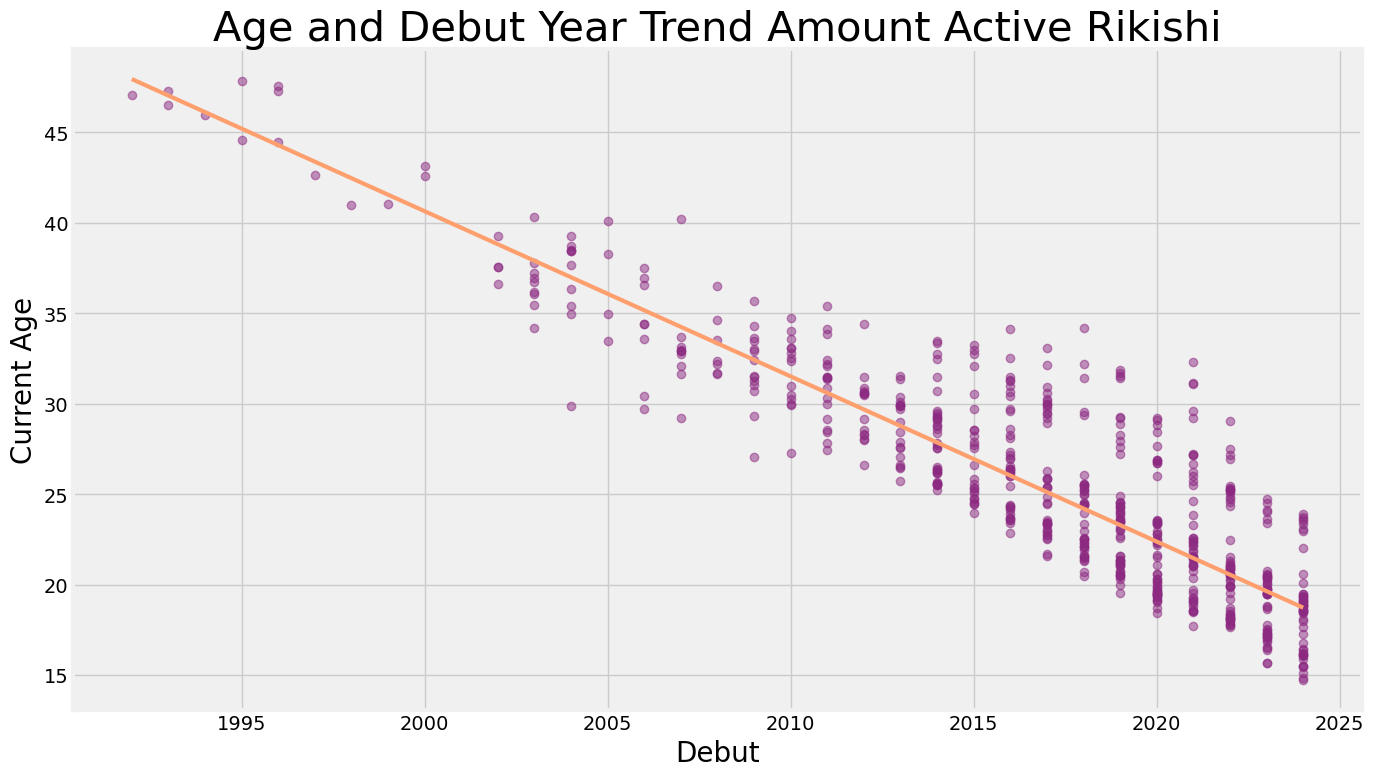

In [117]:
plt.figure(figsize = (14, 8))
plt.style.use('fivethirtyeight')


plt.title('Age and Debut Year Trend Amount Active Rikishi',
         size = 30)

plt.xlabel('Debut', size = 20)

sns.regplot(data = active_sumo_df,
            x = 'debut',
            y = 'age',
            ci = None,
            color = cm.magma(0.4),
            y_jitter = .60,
            scatter_kws={'alpha': 0.5},
            line_kws={'lw': 3, 'color':cm.magma(0.8)},
            robust = True)

plt.xlabel('Debut', size = 20)
plt.ylabel('Current Age', size = 20)

plt.tight_layout()
plt.savefig('../plots/active_rikisi_age_vs_debut.png', dpi = 192);

In [118]:
debut_count = sumo_df['debut'].value_counts().sort_index()
debut_count_df = debut_count.to_frame().reset_index()
debut_count_df.columns = ['year', 'count']

In [119]:
debut_count_df
debut_count_after_1950_df = debut_count_df[debut_count_df['year'] >= 1950]

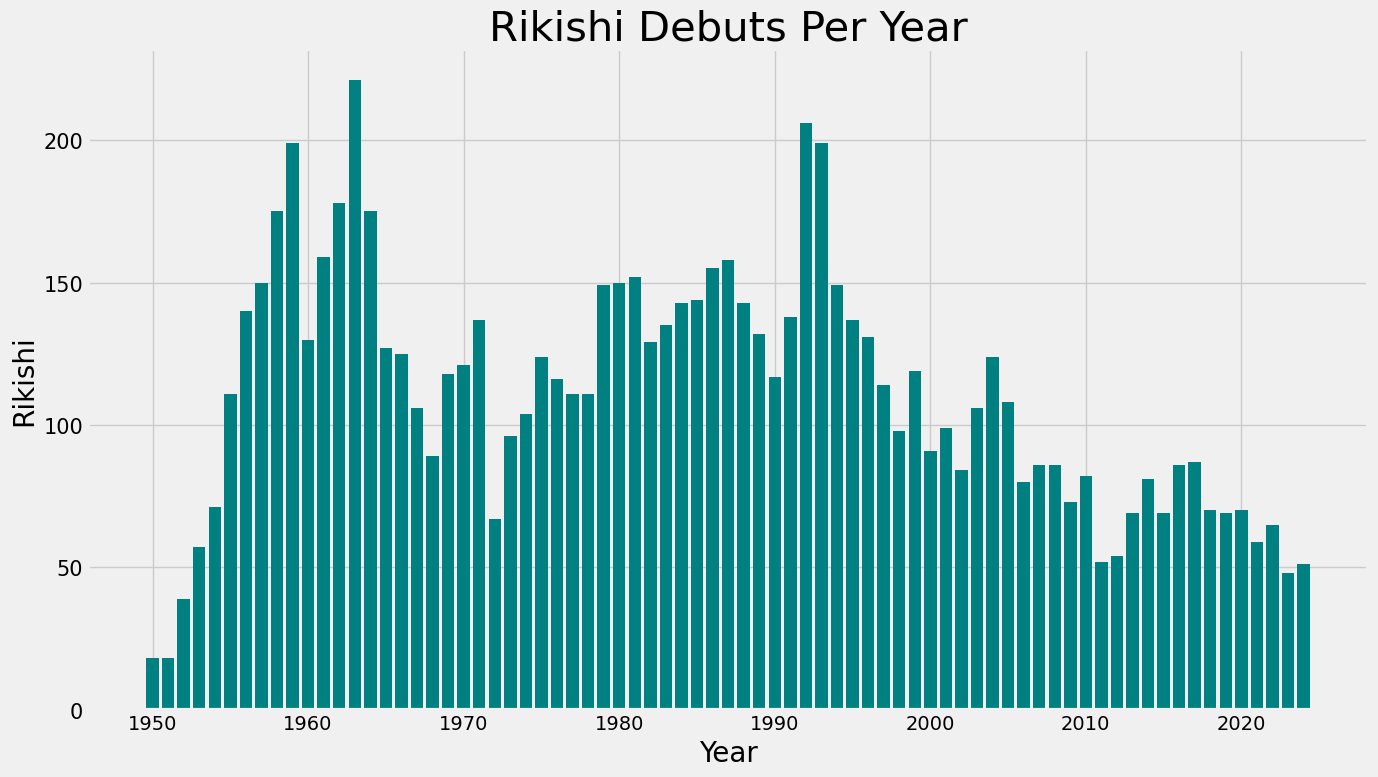

In [120]:
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
plt.style.use('fivethirtyeight')

# Bar Plot
plt.bar(debut_count_after_1950_df['year'], debut_count_after_1950_df['count'], color='teal')

# Customize Titles and Labels
plt.xlabel('Year', size=20)
plt.ylabel('Rikishi', size=20)
plt.title('Rikishi Debuts Per Year', size=30)

# Customize x-ticks

# Customize y-ticks
plt.yticks(size=15)

# Adjust layout to fit labels and titles
plt.tight_layout()

plt.savefig('../plots/sumo_debuts.png', dpi = 192);

In [121]:
active_sumo_df

,index,id,sumodb_id,nsk_id,ring_name,current_rank,heya,birthday,height,weight,debut,total_wins,total_losses,total_matches,age,win_rate
0,16,218,12889,1306,Dairaido,Sandanme,Takadagawa,1980-04-17T00:00:00Z,177.0,151.0,1996,619,580,1199,44,51.63
1,57,299,7124,2983,Kayatoiwa,Sandanme,Minato,1991-07-13T00:00:00Z,176.0,103.5,2007,337,347,684,33,49.27
2,74,36,11784,3206,Myogiryu,Juryo,Sakaigawa,1990-02-27T15:00:00Z,188.0,154.0,2009,601,597,1198,34,50.17
3,122,275,12327,3718,Oshozan,Sandanme,Naruto,2000-05-11T00:00:00Z,168.0,123.0,2016,164,153,317,24,51.74
4,129,614,12799,4190,Daitengu,Jonidan,Takadagawa,2004-06-17T00:00:00Z,177.0,93.0,2023,28,35,63,20,44.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,8935,8937,12887,4277,Miyafuji,Jonokuchi,Isegahama,2005-07-27T15:00:00Z,173.0,140.0,2024,4,3,7,19,57.14
635,8936,8938,12893,4284,Kotomotomura,Jonokuchi,Sadogatake,2008-08-13T15:00:00Z,160.0,68.0,2024,4,3,7,16,57.14
636,8937,8939,12891,4282,Musubiyama,Jonokuchi,Hanaregoma,2006-03-30T15:00:00Z,188.0,104.0,2024,4,3,7,18,57.14
637,8938,8940,12886,4276,Kikuchi,Jonokuchi,Futagoyama,2009-02-02T15:00:00Z,175.0,105.0,2024,2,5,7,15,28.57
